In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Data Exploration

In [2]:
home_des = pd.read_csv("E:/Home Credit/Week 4/HomeCredit_columns_description.csv",encoding='Latin-1')
pd.DataFrame(home_des)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [3]:
app_train = pd.read_csv("E:/Home Credit/Week 4/application_train.csv")
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_test = pd.read_csv("E:/Home Credit/Week 4/application_test.csv")
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

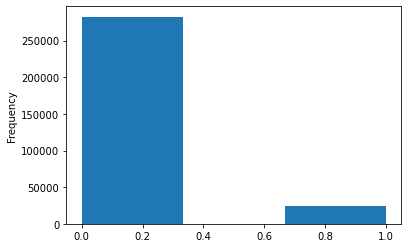

In [6]:
app_train['TARGET'].astype(int).plot.hist(bins=3);

# Data Cleaning

In [7]:
app_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
app_train.isnull().sum()[app_train.isnull().sum()>0].index

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [9]:
NULL =['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']

In [10]:
app_train.dropna(axis=0, inplace=True, subset=NULL)

In [11]:
app_train.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [12]:
app_test.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [13]:
app_test.isnull().sum()[app_test.isnull().sum()>0].index

Index(['AMT_ANNUITY', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPART

In [14]:
NULL_2 = ['AMT_ANNUITY', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']

In [15]:
app_test.dropna(axis=0, inplace=True, subset=NULL)

In [16]:
app_test.isnull().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 121, dtype: int64

In [17]:
pd.DataFrame(app_train).corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,0.015474,0.005075,-0.011396,-0.013768,-0.032327,-0.016785,-0.006509,0.006310,-0.011304,...,0.022281,0.003473,-0.005464,0.006155,-0.010707,0.001187,-0.007661,-0.010726,-0.008949,-0.017236
TARGET,0.015474,1.000000,-0.019993,-0.039762,-0.014634,-0.000765,-0.021950,-0.021225,0.041108,0.062950,...,-0.006139,0.013976,-0.008259,-0.003892,0.012156,0.014616,0.015000,-0.004202,0.016465,0.033832
CNT_CHILDREN,0.005075,-0.019993,1.000000,-0.023069,-0.015191,-0.020395,-0.021157,-0.025688,0.175747,0.014600,...,-0.010280,-0.012527,-0.006602,-0.011857,-0.009919,-0.002712,-0.001043,-0.023803,-0.022028,-0.035499
AMT_INCOME_TOTAL,-0.011396,-0.039762,-0.023069,1.000000,0.348575,0.415807,0.354556,0.211133,-0.119206,-0.028260,...,0.041473,0.010493,0.003233,0.031045,0.026559,-0.001641,0.024093,0.024042,0.006707,-0.007158
AMT_CREDIT,-0.013768,-0.014634,-0.015191,0.348575,1.000000,0.751587,0.987994,0.110804,-0.198152,-0.068760,...,0.061362,0.044737,0.073881,0.016894,0.007742,0.018995,0.012926,0.056718,0.003209,-0.057768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.001187,0.014616,-0.002712,-0.001641,0.018995,0.014015,0.019636,-0.006398,0.018687,0.025302,...,0.005988,-0.001495,-0.002006,-0.000945,0.214817,1.000000,0.215462,-0.002107,-0.014587,0.003018
AMT_REQ_CREDIT_BUREAU_WEEK,-0.007661,0.015000,-0.001043,0.024093,0.012926,0.026397,0.014701,-0.000075,0.003329,0.004644,...,-0.007608,-0.004512,-0.006055,-0.002853,0.021885,0.215462,1.000000,-0.012199,-0.043595,0.024866
AMT_REQ_CREDIT_BUREAU_MON,-0.010726,-0.004202,-0.023803,0.024042,0.056718,0.025826,0.053417,0.081290,-0.036862,-0.014233,...,-0.009728,-0.003885,-0.004528,-0.005364,0.013652,-0.002107,-0.012199,1.000000,-0.035314,-0.010767
AMT_REQ_CREDIT_BUREAU_QRT,-0.008949,0.016465,-0.022028,0.006707,0.003209,0.016595,0.004426,-0.024234,-0.014376,0.025230,...,-0.006256,-0.010430,-0.013997,-0.006595,0.000241,-0.014587,-0.043595,-0.035314,1.000000,0.088951


In [18]:
app_train.corr()['TARGET'].sort_values().head(40)

EXT_SOURCE_3                 -0.150720
EXT_SOURCE_2                 -0.130969
EXT_SOURCE_1                 -0.129548
FLOORSMAX_AVG                -0.046110
FLOORSMAX_MODE               -0.045990
FLOORSMAX_MEDI               -0.045206
AMT_INCOME_TOTAL             -0.039762
FLOORSMIN_MEDI               -0.033313
FLOORSMIN_AVG                -0.032904
FLOORSMIN_MODE               -0.031688
TOTALAREA_MODE               -0.029714
LIVINGAPARTMENTS_AVG         -0.028103
APARTMENTS_AVG               -0.028069
FLAG_DOCUMENT_13             -0.027218
YEARS_BUILD_AVG              -0.026922
LIVINGAPARTMENTS_MEDI        -0.026595
APARTMENTS_MEDI              -0.026566
YEARS_BUILD_MEDI             -0.026491
ELEVATORS_AVG                -0.025762
LIVINGAREA_AVG               -0.025545
YEARS_BUILD_MODE             -0.025116
LIVINGAREA_MEDI              -0.024612
LIVINGAPARTMENTS_MODE        -0.024423
ELEVATORS_MEDI               -0.024361
LIVINGAREA_MODE              -0.024207
CNT_FAM_MEMBERS          

In [19]:
app_train.corr()['TARGET'].sort_values().tail(20)

SK_ID_CURR                     0.015474
AMT_REQ_CREDIT_BUREAU_QRT      0.016465
DAYS_LAST_PHONE_CHANGE         0.019082
DEF_60_CNT_SOCIAL_CIRCLE       0.020796
FLAG_DOCUMENT_7                0.021218
DEF_30_CNT_SOCIAL_CIRCLE       0.022807
DAYS_ID_PUBLISH                0.024877
OWN_CAR_AGE                    0.028052
OBS_60_CNT_SOCIAL_CIRCLE       0.030730
OBS_30_CNT_SOCIAL_CIRCLE       0.031041
AMT_REQ_CREDIT_BUREAU_YEAR     0.033832
DAYS_BIRTH                     0.041108
REGION_RATING_CLIENT           0.053614
FLAG_DOCUMENT_3                0.054269
REGION_RATING_CLIENT_W_CITY    0.061214
DAYS_EMPLOYED                  0.062950
TARGET                         1.000000
FLAG_MOBIL                          NaN
FLAG_DOCUMENT_2                     NaN
FLAG_DOCUMENT_4                     NaN
Name: TARGET, dtype: float64

In [20]:
app_train.corr()['TARGET'][abs(app_train.corr()['TARGET']) < 0.02 ].index

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY',
       'DAYS_REGISTRATION', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG',
       'LANDAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'COMMONAREA_MODE', 'ENTRANCES_MODE',
       'LANDAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'COMMONAREA_MEDI',
       'ENTRANCES_MEDI', 'LANDAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOC

In [21]:
train = app_train.drop(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY',
       'DAYS_REGISTRATION', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG',
       'LANDAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'COMMONAREA_MODE', 'ENTRANCES_MODE',
       'LANDAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'COMMONAREA_MEDI',
       'ENTRANCES_MEDI', 'LANDAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_MOBIL','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4'], axis = 1)

In [22]:
train.head(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_7,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16,AMT_REQ_CREDIT_BUREAU_YEAR
71,0,Cash loans,M,Y,Y,103500.0,463500.0,Unaccompanied,Working,Secondary / secondary special,...,2.0,1.0,2.0,1.0,1,0,0,0,0,3.0
124,0,Cash loans,F,Y,Y,202500.0,198000.0,Family,Working,Secondary / secondary special,...,6.0,0.0,6.0,0.0,1,0,0,0,0,3.0
152,0,Cash loans,F,Y,N,202500.0,675000.0,Unaccompanied,Commercial associate,Higher education,...,0.0,0.0,0.0,0.0,0,0,0,0,0,4.0
161,0,Cash loans,M,Y,N,162000.0,238500.0,Unaccompanied,Commercial associate,Higher education,...,5.0,0.0,5.0,0.0,1,0,0,0,0,3.0
255,1,Cash loans,M,Y,N,225000.0,774000.0,Unaccompanied,Commercial associate,Secondary / secondary special,...,3.0,0.0,3.0,0.0,1,0,0,0,0,1.0


In [23]:
test = app_test.drop(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY',
       'DAYS_REGISTRATION', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG',
       'LANDAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'COMMONAREA_MODE', 'ENTRANCES_MODE',
       'LANDAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'COMMONAREA_MEDI',
       'ENTRANCES_MEDI', 'LANDAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'FLAG_MOBIL','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4'], axis = 1)

In [24]:
test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_7,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16,AMT_REQ_CREDIT_BUREAU_YEAR
15,Cash loans,M,Y,Y,180000.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,...,2.0,0.0,2.0,0.0,0,0,0,0,0,3.0
18,Cash loans,F,Y,Y,225000.0,360000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,...,5.0,0.0,5.0,0.0,1,0,0,0,0,4.0
73,Cash loans,M,Y,Y,180000.0,67500.0,Unaccompanied,Working,Secondary / secondary special,Married,...,3.0,0.0,3.0,0.0,0,0,0,0,0,2.0
86,Cash loans,M,Y,Y,225000.0,270000.0,Unaccompanied,Working,Higher education,Married,...,3.0,0.0,3.0,0.0,1,0,0,0,0,3.0
102,Cash loans,M,Y,N,202500.0,697500.0,Unaccompanied,Working,Incomplete higher,Married,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0.0


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 71 to 307482
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET                       8602 non-null   int64  
 1   NAME_CONTRACT_TYPE           8602 non-null   object 
 2   CODE_GENDER                  8602 non-null   object 
 3   FLAG_OWN_CAR                 8602 non-null   object 
 4   FLAG_OWN_REALTY              8602 non-null   object 
 5   AMT_INCOME_TOTAL             8602 non-null   float64
 6   AMT_GOODS_PRICE              8602 non-null   float64
 7   NAME_TYPE_SUITE              8602 non-null   object 
 8   NAME_INCOME_TYPE             8602 non-null   object 
 9   NAME_EDUCATION_TYPE          8602 non-null   object 
 10  NAME_FAMILY_STATUS           8602 non-null   object 
 11  NAME_HOUSING_TYPE            8602 non-null   object 
 12  REGION_POPULATION_RELATIVE   8602 non-null   float64
 13  DAYS_BIRTH     

In [26]:
train['NAME_CONTRACT_TYPE'].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [27]:
train["NAME_CONTRACT_TYPE"].replace({'Cash loans':0,'Revolving loans':1}, inplace=True)
test["NAME_CONTRACT_TYPE"].replace({'Cash loans':0,'Revolving loans':1}, inplace=True)

In [28]:
train['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

In [29]:
train['CODE_GENDER'].replace({'M':0,'F':1}, inplace=True)
test['CODE_GENDER'].replace({'M':0,'F':1}, inplace=True)

In [30]:
train['FLAG_OWN_CAR'].unique()

array(['Y'], dtype=object)

In [31]:
train['FLAG_OWN_CAR'].replace({'N':0,'Y':1}, inplace=True)
test['FLAG_OWN_CAR'].replace({'N':0,'Y':1}, inplace=True)

In [32]:
train['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [33]:
train['FLAG_OWN_REALTY'].replace({'N':0,'Y':1}, inplace=True)
test['FLAG_OWN_REALTY'].replace({'N':0,'Y':1}, inplace=True)

In [34]:
train['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', 'Other_B', 'Group of people'], dtype=object)

In [35]:
train["NAME_TYPE_SUITE"].replace({'Children':1,'Family':2,'Group of people':3,'Other_A':4,'Other_B':5,'Spouse, partner':6,'Unaccompanied':7}, inplace=True)
test["NAME_TYPE_SUITE"].replace({'Children':1,'Family':2,'Group of people':3,'Other_A':4,'Other_B':5,'Spouse, partner':6,'Unaccompanied':7}, inplace=True)

In [36]:
train['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'State servant'], dtype=object)

In [37]:
train['NAME_INCOME_TYPE'].replace({'Working':1, 'Commercial associate':2, 'State servant':3}, inplace=True)
test['NAME_INCOME_TYPE'].replace({'Working':1, 'Commercial associate':2, 'State servant':3}, inplace=True)

In [38]:
train['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [39]:
train["NAME_EDUCATION_TYPE"].replace({'Academic degree':1,'Higher education':2,'Incomplete higher':3,'Lower secondary':4, 'Secondary / secondary special':5}, inplace=True)
test["NAME_EDUCATION_TYPE"].replace({'Academic degree':1,'Higher education':2,'Incomplete higher':3,'Lower secondary':4, 'Secondary / secondary special':5}, inplace=True)

In [40]:
train['NAME_FAMILY_STATUS'].unique()

array(['Married', 'Separated', 'Single / not married', 'Widow',
       'Civil marriage'], dtype=object)

In [41]:
train["NAME_FAMILY_STATUS"].replace({'Civil marriage':1,'Married':2,'Separated':3,'Single / not married':4, 'Unknown':5,'Widow':6}, inplace=True)
test["NAME_FAMILY_STATUS"].replace({'Civil marriage':1,'Married':2,'Separated':3,'Single / not married':4, 'Unknown':5,'Widow':6}, inplace=True)

In [42]:
train['NAME_HOUSING_TYPE'].unique()

array(['House / apartment', 'With parents', 'Municipal apartment',
       'Office apartment', 'Co-op apartment', 'Rented apartment'],
      dtype=object)

In [43]:
train["NAME_HOUSING_TYPE"].replace({'Co-op apartment':1,'House / apartment':2,'Municipal apartment':3,'Office apartment':4,'Rented apartment':5,'With parents':6}, inplace=True)
test["NAME_HOUSING_TYPE"].replace({'Co-op apartment':1,'House / apartment':2,'Municipal apartment':3,'Office apartment':4,'Rented apartment':5,'With parents':6}, inplace=True)

In [44]:
train['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Managers', 'Drivers', 'Core staff', 'Sales staff',
       'High skill tech staff', 'Medicine staff', 'Accountants',
       'Private service staff', 'Cooking staff', 'HR staff',
       'Cleaning staff', 'Security staff', 'Secretaries', 'IT staff',
       'Realty agents', 'Waiters/barmen staff', 'Low-skill Laborers'],
      dtype=object)

In [45]:
train["OCCUPATION_TYPE"].replace({'Accountants':1,
 'Cleaning staff':2,
 'Cooking staff':3,
 'Core staff':4,
 'Drivers':5,
 'HR staff':6,
 'High skill tech staff':7,
 'IT staff':8,
 'Laborers':9,
 'Low-skill Laborers':10,
 'Managers':11,
 'Medicine staff':12,
 'Private service staff':13,
 'Realty agents':14,
 'Sales staff':15,
 'Secretaries':16,
 'Security staff':17,
 'Waiters/barmen staff':18
}, inplace=True)
test["OCCUPATION_TYPE"].replace({'Accountants':1,
 'Cleaning staff':2,
 'Cooking staff':3,
 'Core staff':4,
 'Drivers':5,
 'HR staff':6,
 'High skill tech staff':7,
 'IT staff':8,
 'Laborers':9,
 'Low-skill Laborers':10,
 'Managers':11,
 'Medicine staff':12,
 'Private service staff':13,
 'Realty agents':14,
 'Sales staff':15,
 'Secretaries':16,
 'Security staff':17,
 'Waiters/barmen staff':18
}, inplace=True)

In [46]:
train['WEEKDAY_APPR_PROCESS_START'].unique()

array(['MONDAY', 'TUESDAY', 'THURSDAY', 'SATURDAY', 'WEDNESDAY', 'FRIDAY',
       'SUNDAY'], dtype=object)

In [47]:
train["WEEKDAY_APPR_PROCESS_START"].replace({'FRIDAY':1, 'MONDAY':2, 'SATURDAY':3, 'SUNDAY':4, 'THURSDAY':5, 'TUESDAY':6, 'WEDNESDAY':7}, inplace=True)
test["WEEKDAY_APPR_PROCESS_START"].replace({'FRIDAY':1, 'MONDAY':2, 'SATURDAY':3, 'SUNDAY':4, 'THURSDAY':5, 'TUESDAY':6, 'WEDNESDAY':7}, inplace=True)

In [48]:
train['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'Self-employed', 'Trade: type 7',
       'Government', 'Industry: type 2', 'Bank', 'Kindergarten',
       'Transport: type 3', 'Business Entity Type 2', 'Trade: type 3',
       'Transport: type 4', 'Industry: type 9', 'Medicine', 'Other',
       'Hotel', 'Services', 'Construction', 'School', 'Transport: type 2',
       'Trade: type 2', 'Business Entity Type 1', 'Housing', 'Police',
       'Trade: type 6', 'Restaurant', 'Military', 'Industry: type 11',
       'Agriculture', 'Security', 'Electricity', 'Telecom', 'Mobile',
       'Postal', 'Security Ministries', 'Transport: type 1',
       'Industry: type 7', 'University', 'Advertising', 'Realtor',
       'Industry: type 10', 'Insurance', 'Industry: type 5',
       'Industry: type 1', 'Legal Services', 'Religion',
       'Industry: type 12', 'Industry: type 4', 'Industry: type 3',
       'Emergency', 'Cleaning', 'Trade: type 1', 'Culture',
       'Trade: type 4', 'Industry: type 8', 'Industry: type 6'],
  

In [49]:
train["ORGANIZATION_TYPE"].replace({'Advertising':1,
 'Agriculture':2,
 'Bank':3,
 'Business Entity Type 1':4,
 'Business Entity Type 2':5,
 'Business Entity Type 3':6,
 'Cleaning':7,
 'Construction':8,
 'Culture':9,
 'Electricity':10,
 'Emergency':11,
 'Government':12,
 'Hotel':13,
 'Housing':14,
 'Industry: type 1':15,
 'Industry: type 10':16,
 'Industry: type 11':17,
 'Industry: type 12':18,
 'Industry: type 13':19,
 'Industry: type 2':20,
 'Industry: type 3':21,
 'Industry: type 4':22,
 'Industry: type 5':23,
 'Industry: type 6':24,
 'Industry: type 7':25,
 'Industry: type 8':26,
 'Industry: type 9':27,
 'Insurance':28,
 'Kindergarten':29,
 'Legal Services':30,
 'Medicine':31,
 'Military':32,
 'Mobile':33,
 'Other':34,
 'Police':35,
 'Postal':36,
 'Realtor':37,
 'Religion':38,
 'Restaurant':39,
 'School':40,
 'Security':41,
 'Security Ministries':42,
 'Self-employed':43,
 'Services':44,
 'Telecom':45,
 'Trade: type 1':46,
 'Trade: type 2':47,
 'Trade: type 3':48,
 'Trade: type 4':49,
 'Trade: type 5':50,
 'Trade: type 6':51,
 'Trade: type 7':52,
 'Transport: type 1':53,
 'Transport: type 2':54,
 'Transport: type 3':55,
 'Transport: type 4':56,
 'University':57,
 'XNA':58}, inplace=True)

test["ORGANIZATION_TYPE"].replace({'Advertising':1,
 'Agriculture':2,
 'Bank':3,
 'Business Entity Type 1':4,
 'Business Entity Type 2':5,
 'Business Entity Type 3':6,
 'Cleaning':7,
 'Construction':8,
 'Culture':9,
 'Electricity':10,
 'Emergency':11,
 'Government':12,
 'Hotel':13,
 'Housing':14,
 'Industry: type 1':15,
 'Industry: type 10':16,
 'Industry: type 11':17,
 'Industry: type 12':18,
 'Industry: type 13':19,
 'Industry: type 2':20,
 'Industry: type 3':21,
 'Industry: type 4':22,
 'Industry: type 5':23,
 'Industry: type 6':24,
 'Industry: type 7':25,
 'Industry: type 8':26,
 'Industry: type 9':27,
 'Insurance':28,
 'Kindergarten':29,
 'Legal Services':30,
 'Medicine':31,
 'Military':32,
 'Mobile':33,
 'Other':34,
 'Police':35,
 'Postal':36,
 'Realtor':37,
 'Religion':38,
 'Restaurant':39,
 'School':40,
 'Security':41,
 'Security Ministries':42,
 'Self-employed':43,
 'Services':44,
 'Telecom':45,
 'Trade: type 1':46,
 'Trade: type 2':47,
 'Trade: type 3':48,
 'Trade: type 4':49,
 'Trade: type 5':50,
 'Trade: type 6':51,
 'Trade: type 7':52,
 'Transport: type 1':53,
 'Transport: type 2':54,
 'Transport: type 3':55,
 'Transport: type 4':56,
 'University':57,
 'XNA':58}, inplace=True)

In [50]:
train['FONDKAPREMONT_MODE'].unique()

array(['reg oper account', 'reg oper spec account', 'org spec account',
       'not specified'], dtype=object)

In [51]:
train["FONDKAPREMONT_MODE"].replace({'not specified':1,
 'org spec account':2,
 'reg oper account':3,
 'reg oper spec account':4}, inplace=True)

test["FONDKAPREMONT_MODE"].replace({'not specified':1,
 'org spec account':2,
 'reg oper account':3,
 'reg oper spec account':4}, inplace=True)

In [52]:
train['HOUSETYPE_MODE'].unique()

array(['block of flats', 'specific housing', 'terraced house'],
      dtype=object)

In [53]:
train["HOUSETYPE_MODE"].replace({'block of flats':1, 'specific housing':2, 'terraced house':3}, inplace=True)
test["HOUSETYPE_MODE"].replace({'block of flats':1, 'specific housing':2, 'terraced house':3}, inplace=True)

In [54]:
train['WALLSMATERIAL_MODE'].unique()

array(['Stone, brick', 'Panel', 'Monolithic', 'Block', 'Wooden', 'Mixed',
       'Others'], dtype=object)

In [55]:
train['WALLSMATERIAL_MODE'].replace({'Stone, brick':1, 'Panel':2, 'Monolithic':3, 'Block':4, 'Wooden':5, 'Mixed':6,
       'Others':7}, inplace=True)
test['WALLSMATERIAL_MODE'].replace({'Stone, brick':1, 'Panel':2, 'Monolithic':3, 'Block':4, 'Wooden':5, 'Mixed':6,
       'Others':7}, inplace=True)

In [56]:
train['EMERGENCYSTATE_MODE'].unique()

array(['No', 'Yes'], dtype=object)

In [57]:
train["EMERGENCYSTATE_MODE"].replace({'No':0,'Yes':1}, inplace=True)
test["EMERGENCYSTATE_MODE"].replace({'No':0,'Yes':1}, inplace=True)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 71 to 307482
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET                       8602 non-null   int64  
 1   NAME_CONTRACT_TYPE           8602 non-null   int64  
 2   CODE_GENDER                  8602 non-null   int64  
 3   FLAG_OWN_CAR                 8602 non-null   int64  
 4   FLAG_OWN_REALTY              8602 non-null   int64  
 5   AMT_INCOME_TOTAL             8602 non-null   float64
 6   AMT_GOODS_PRICE              8602 non-null   float64
 7   NAME_TYPE_SUITE              8602 non-null   int64  
 8   NAME_INCOME_TYPE             8602 non-null   int64  
 9   NAME_EDUCATION_TYPE          8602 non-null   int64  
 10  NAME_FAMILY_STATUS           8602 non-null   int64  
 11  NAME_HOUSING_TYPE            8602 non-null   int64  
 12  REGION_POPULATION_RELATIVE   8602 non-null   float64
 13  DAYS_BIRTH     

In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 15 to 48710
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NAME_CONTRACT_TYPE           1739 non-null   int64  
 1   CODE_GENDER                  1739 non-null   int64  
 2   FLAG_OWN_CAR                 1739 non-null   int64  
 3   FLAG_OWN_REALTY              1739 non-null   int64  
 4   AMT_INCOME_TOTAL             1739 non-null   float64
 5   AMT_GOODS_PRICE              1739 non-null   float64
 6   NAME_TYPE_SUITE              1739 non-null   int64  
 7   NAME_INCOME_TYPE             1739 non-null   int64  
 8   NAME_EDUCATION_TYPE          1739 non-null   int64  
 9   NAME_FAMILY_STATUS           1739 non-null   int64  
 10  NAME_HOUSING_TYPE            1739 non-null   int64  
 11  REGION_POPULATION_RELATIVE   1739 non-null   float64
 12  DAYS_BIRTH                   1739 non-null   int64  
 13  DAYS_EMPLOYED   

In [60]:
train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_7,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16,AMT_REQ_CREDIT_BUREAU_YEAR
71,0,0,0,1,1,103500.0,463500.0,7,1,5,...,2.0,1.0,2.0,1.0,1,0,0,0,0,3.0
124,0,0,1,1,1,202500.0,198000.0,2,1,5,...,6.0,0.0,6.0,0.0,1,0,0,0,0,3.0
152,0,0,1,1,0,202500.0,675000.0,7,2,2,...,0.0,0.0,0.0,0.0,0,0,0,0,0,4.0
161,0,0,0,1,0,162000.0,238500.0,7,2,2,...,5.0,0.0,5.0,0.0,1,0,0,0,0,3.0
255,1,0,0,1,0,225000.0,774000.0,7,2,5,...,3.0,0.0,3.0,0.0,1,0,0,0,0,1.0


In [61]:
test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_7,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16,AMT_REQ_CREDIT_BUREAU_YEAR
15,0,0,1,1,180000.0,225000.0,7,1,5,1,...,2.0,0.0,2.0,0.0,0,0,0,0,0,3.0
18,0,1,1,1,225000.0,360000.0,7,2,2,1,...,5.0,0.0,5.0,0.0,1,0,0,0,0,4.0
73,0,0,1,1,180000.0,67500.0,7,1,5,2,...,3.0,0.0,3.0,0.0,0,0,0,0,0,2.0
86,0,0,1,1,225000.0,270000.0,7,1,2,2,...,3.0,0.0,3.0,0.0,1,0,0,0,0,3.0
102,0,0,1,0,202500.0,697500.0,7,1,3,2,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0.0


# Data Processing

In [172]:
y = train.iloc[:, 0].values
x = train.iloc[:, 1:64].values

In [173]:
import imblearn
from imblearn.over_sampling import SMOTE

In [174]:
x_smote, y_smote = SMOTE().fit_resample(x, y)

In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
x_smote = StandardScaler().fit_transform(x_smote)

In [177]:
from sklearn.model_selection import train_test_split

In [185]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = .3, random_state = 1)

In [186]:
y_train.shape

(11306,)

# Modelling Data

# Logistic Regression

In [187]:
classifier =  LogisticRegression(max_iter=3000)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [188]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

In [189]:
log_accuracy=accuracy_score(y_test, y_pred)
log_recall=recall_score(y_test,y_pred)
log_precision=precision_score(y_test,y_pred)
log_rocauc=roc_auc_score(y_test,y_pred)

In [190]:
print('{:.4f}'.format(log_accuracy), '- Log Accuracy')
print('{:.4f}'.format(log_recall), '- Log Recall')
print('{:.4f}'.format(log_precision), '- Log Precision')
print('{:.4f}'.format(log_rocauc), '- Log ROC AUC')

0.7097 - Log Accuracy
0.7172 - Log Recall
0.7099 - Log Precision
0.7096 - Log ROC AUC


In [191]:
predictions = classifier.predict_proba(x_test)
predictions

array([[0.83138937, 0.16861063],
       [0.61589027, 0.38410973],
       [0.558194  , 0.441806  ],
       ...,
       [0.93911099, 0.06088901],
       [0.23931385, 0.76068615],
       [0.42629346, 0.57370654]])

In [192]:
pred = pd.DataFrame(predictions).head()
pred

,0,1
0,0.831389,0.168611
1,0.615890,0.384110
2,0.558194,0.441806
3,0.361772,0.638228
4,0.626280,0.373720


In [193]:
df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(classifier.predict(x_test), columns = ['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])

df=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)
df.sort_values(by=['prob_0'],  ascending=[False],inplace=True)

In [162]:
df

,Actual Outcome,prob_0,prob_1,predicted_TARGET
3211,0,1.000000,1.734136e-08,0
3028,0,0.999897,1.030520e-04,0
3976,0,0.998279,1.720680e-03,0
803,0,0.998069,1.930545e-03,0
2802,0,0.997835,2.164564e-03,0
...,...,...,...,...
3432,1,0.021830,9.781698e-01,1
1625,1,0.019195,9.808050e-01,1
2708,1,0.018730,9.812697e-01,1
2178,1,0.014553,9.854473e-01,1


In [163]:
df2 = df.sort_values(by=['Actual Outcome'],  ascending=[False], inplace=False)

In [164]:
df2.head(30)

,Actual Outcome,prob_0,prob_1,predicted_TARGET
2165,1,0.012413,0.987587,1
4658,1,0.592453,0.407547,0
313,1,0.595204,0.404796,0
677,1,0.330638,0.669362,1
1413,1,0.330640,0.669360,1
3701,1,0.594363,0.405637,0
2321,1,0.594239,0.405761,0
3003,1,0.330816,0.669184,1
4742,1,0.593024,0.406976,0
4126,1,0.331011,0.668989,1


# NAIVE BAYES

In [170]:
from sklearn.naive_bayes import GaussianNB

In [195]:
nb = GaussianNB()
clf =nb.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [196]:
log_accuracy=accuracy_score(y_test, y_pred)
log_recall=recall_score(y_test,y_pred)
log_precision=precision_score(y_test,y_pred)
log_rocauc=roc_auc_score(y_test,y_pred)

In [197]:
print('{:.4f}'.format(log_accuracy), '- Log Accuracy')
print('{:.4f}'.format(log_recall), '- Log Recall')
print('{:.4f}'.format(log_precision), '- Log Precision')
print('{:.4f}'.format(log_rocauc), '- Log ROC AUC')

0.6286 - Log Accuracy
0.8641 - Log Recall
0.5898 - Log Precision
0.6266 - Log ROC AUC
